# 中尺度模式定量降水预报数据处理

将华东、GrapesMeso、北京RMAPS处理成为具有统一空间范围、分辨率的逐小时降水预报数据:
* 空间范围参照Grapes3km, 经度范围[102, 135], 纬度范围[17, 50]
* 空间分辨率为0.1x0.1
* 预报时效为36h时效
* 起报时间为每日00h, 12h

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pathlib
import shutil
import warnings
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from nmc_met_graphics.plot.china_map import add_china_map_2cartopy
from nmc_met_graphics.cmap.ctables import cm_qpf_nws
warnings.filterwarnings('ignore')

## 华东区域模式处理

In [4]:
# set origin and output directory
data_dir = pathlib.Path("I:/Level_00/shanghai9km")
out_dir = pathlib.Path("I:/Level_01/shanghai9km")

# set forecast hours
fhours = np.arange(36) + 1

# loop every running time
for file_dir in data_dir.glob("????????12"):
    # extract model initial time
    init_time = datetime.strptime(file_dir.name, "%Y%m%d%H")
        
    # check missing file directory
    file_missing = False
    for ifhour in fhours:
        file = file_dir.joinpath(
            "shanghai9km_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not file.is_file():
            file_missing = True
            break
    if file_missing:
        print("Missing:"+init_time.strftime("%Y%m%d%H%M"))
        continue
        
    # create output subdirectory
    out_subdir = out_dir.joinpath(init_time.strftime("%Y%m%d%H"))
    if not out_subdir.exists():
        out_subdir.mkdir(parents=True, exist_ok=True)
    
    # loop every forecast hour
    for ifhour in fhours:
        # construct file name
        file1 = file_dir.joinpath(
            "shanghai9km_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        
        # calculate 1h accumulated precipitation
        if ifhour == 1:
            ds1 = xr.open_dataset(file1)
        else:
            ds0 = xr.open_dataset(file0)
            ds1 = xr.open_dataset(file1)
            ds1.tp.values = ds1.tp.values - ds0.tp.values
        
        # save to output subdirectory
        outfile = out_subdir.joinpath(file1.name)
        if not outfile.is_file():
            # subset the grid
            ds1.sel(latitude=slice(17,50),longitude=slice(102,135)).to_netcdf(outfile)
        file0 = file1

Missing:201806220000
Missing:201806230000
Missing:201808220000


In [6]:
ds2 = xr.open_dataset("I://Level_01//shanghai9km//2018040100/shanghai9km_tp_20180401000035.nc")
ds2

<xarray.Dataset>
Dimensions:    (latitude: 331, level: 1, longitude: 331, time: 1)
Coordinates:
  * longitude  (longitude) float32 102.0 102.100006 102.2 ... 134.8 134.9 135.0
  * latitude   (latitude) float32 17.0 17.1 17.2 17.300001 ... 49.8 49.9 50.0
  * level      (level) float32 0.0
  * time       (time) datetime64[ns] 2018-04-01
Data variables:
    fhour      (time) timedelta64[ns] ...
    tp         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:        COARDS
    Product:            SMS_WARMS/SHANGHAI Meso Forecast
    Institution:        National Meteorological Center OF CMA
    RunTime:            2018-04-01T00:00:00Z
    ValidTime:          2018-04-01T00:00:00Z
    StartForecastHour:  -1
    EndForecastHour:    0
    History:            Created time: 2018-11-16T23:24:47

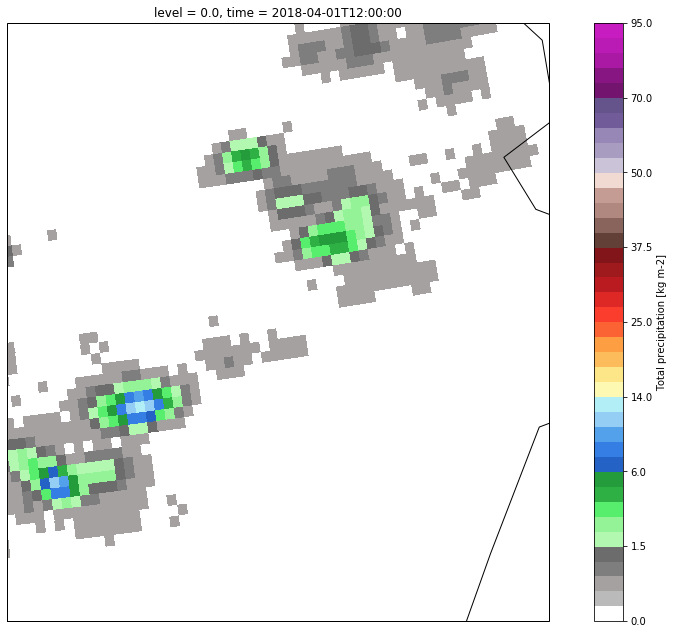

In [17]:
ds2 = xr.open_dataset("I:/Level_01/shanghai9km/2018040112/shanghai9km_tp_20180401120015.nc")
ds2 = ds2.sel(latitude=slice(17,50),longitude=slice(102,135))
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105))
ax.set_extent((116, 121, 27, 32),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds2['tp'].isel(time=0,level=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## RMAPS区域模式处理

In [10]:
# set origin and output directory
data_dir = pathlib.Path("I:/Level_00/rmaps")
out_dir = pathlib.Path("I:/Level_01/rmaps")

# set forecast hours
fhours = np.arange(36) + 1

# loop every running time
for file_dir in data_dir.glob("????????12"):
    # extract model initial time
    init_time = datetime.strptime(file_dir.name, "%Y%m%d%H")
        
    # check missing file directory
    file_missing = False
    for ifhour in fhours:
        file = file_dir.joinpath(
            "rmaps_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not file.is_file():
            file_missing = True
            break
    if file_missing:
        print("Missing:"+init_time.strftime("%Y%m%d%H%M"))
        continue
        
    # create output subdirectory
    out_subdir = out_dir.joinpath(init_time.strftime("%Y%m%d%H"))
    if not out_subdir.exists():
        out_subdir.mkdir(parents=True, exist_ok=True)
    
    # loop every forecast hour
    for ifhour in fhours:
        # construct file name
        file1 = file_dir.joinpath(
            "rmaps_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        
        # calculate 1h accumulated precipitation
        if ifhour == 1:
            ds1 = xr.open_dataset(file1)
        else:
            ds0 = xr.open_dataset(file0)
            ds1 = xr.open_dataset(file1)
            ds1.tp.values = ds1.tp.values - ds0.tp.values
        
        # save to output subdirectory
        outfile = out_subdir.joinpath(file1.name)
        if not outfile.is_file():
            # subset the grid
            ds1.sel(latitude=slice(17,50),longitude=slice(102,135)).to_netcdf(outfile)
        file0 = file1

Missing:201804181200
Missing:201804261200
Missing:201806011200
Missing:201806021200
Missing:201806031200
Missing:201806041200
Missing:201806051200
Missing:201806061200
Missing:201806071200
Missing:201806081200
Missing:201806091200
Missing:201806101200
Missing:201806111200
Missing:201806121200
Missing:201806131200
Missing:201806141200
Missing:201806151200
Missing:201806161200
Missing:201806171200
Missing:201806181200
Missing:201806191200
Missing:201806201200
Missing:201806211200
Missing:201806221200
Missing:201806231200
Missing:201806241200
Missing:201806251200
Missing:201806271200
Missing:201806281200
Missing:201806291200
Missing:201806301200
Missing:201807011200
Missing:201807021200
Missing:201807031200
Missing:201807041200
Missing:201807051200
Missing:201807061200
Missing:201807071200
Missing:201807081200
Missing:201807091200
Missing:201807101200
Missing:201807111200
Missing:201807121200
Missing:201807131200
Missing:201807141200
Missing:201807151200
Missing:201807171200
Missing:20180

## GrapesMeso区域模式处理

In [4]:
# set origin and output directory
data_dir = pathlib.Path("I:/Level_00/grapesMeso")
out_dir = pathlib.Path("I:/Level_01/grapesMeso")

# set forecast hours
fhours = np.arange(30) + 1

# loop every running time
for file_dir in data_dir.glob("??????????"):
    # extract model initial time
    init_time = datetime.strptime(file_dir.name, "%Y%m%d%H")
        
    # check missing file directory
    file_missing = False
    for ifhour in fhours:
        file_a = file_dir.joinpath(
            "grapesMeso_acpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        file_b = file_dir.joinpath(
            "grapesMeso_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not file_a.is_file() or not file_b.is_file():
            file_missing = True
            break
    if file_missing:
        print("Missing:"+init_time.strftime("%Y%m%d%H%M"))
        continue
        
    # create output subdirectory
    out_subdir = out_dir.joinpath(init_time.strftime("%Y%m%d%H"))
    if not out_subdir.exists():
        out_subdir.mkdir(parents=True, exist_ok=True)
    
    # loop every forecast hour
    for ifhour in fhours:
        # construct file name
        file_a1 = file_dir.joinpath(
            "grapesMeso_acpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        file_b1 = file_dir.joinpath(
            "grapesMeso_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        
        # calculate 1h accumulated precipitation
        if ifhour == 1:
            ds_a1 = xr.open_dataset(file_a1)
            ds_b1 = xr.open_dataset(file_b1)
            ds_a1.acpcp.values = ds_a1.acpcp.values + ds_b1.ncpcp.values
        else:
            ds_a0 = xr.open_dataset(file_a0)
            ds_b0 = xr.open_dataset(file_b0)
            ds_a0.acpcp.values = ds_a0.acpcp.values + ds_b0.ncpcp.values
            ds_a1 = xr.open_dataset(file_a1)
            ds_b1 = xr.open_dataset(file_b1)
            ds_a1.acpcp.values = ds_a1.acpcp.values + ds_b1.ncpcp.values
            ds_a1.acpcp.values = ds_a1.acpcp.values - ds_a0.acpcp.values
        
        # save to output subdirectory
        outfile = out_subdir.joinpath(
            "grapesMeso_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not outfile.is_file():
            # subset the grid
            ds_a1.rename({"acpcp":"tp"}).sel(
                latitude=slice(50,17),longitude=slice(102,135)).to_netcdf(outfile)
        file_a0 = file_a1
        file_b0 = file_b1

Missing:201804070300
Missing:201806181200
Missing:201809141200
Missing:201809150000
Missing:201809171500
Missing:201809220000
Missing:201809220300
Missing:201809220600
Missing:201809220900
Missing:201809221200
Missing:201809221500
Missing:201809221800
Missing:201809222100
Missing:201809230000
Missing:201809230300
Missing:201809230600
Missing:201809230900
Missing:201809231200
Missing:201809231500
Missing:201809231800
Missing:201809232100
Missing:201809240000
Missing:201809240300
Missing:201809240600
Missing:201809240900
Missing:201809241200
Missing:201809241500
Missing:201809241800
Missing:201809242100
Missing:201809250000
Missing:201809250300
Missing:201809250600
Missing:201809250900
Missing:201809251200
Missing:201809251500
Missing:201809251800
Missing:201809252100
Missing:201809260000
Missing:201809260300
Missing:201809260600
Missing:201809260900
Missing:201809261200
Missing:201809261500
Missing:201809261800
Missing:201809262100
Missing:201809270000
Missing:201809270300
Missing:20180

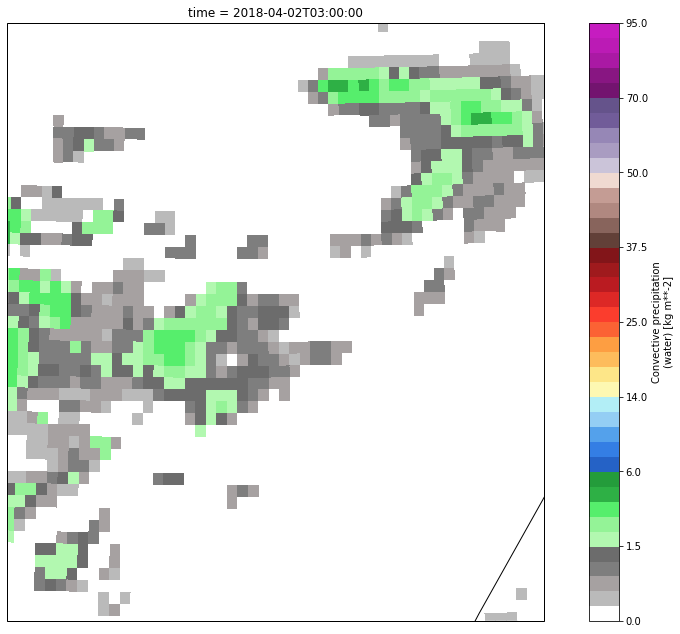

In [18]:
ds2 = xr.open_dataset("I:/Level_01/grapesMeso/2018040112/grapesMeso_tp_20180401120015.nc")
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((116, 121, 27, 32),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds2['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

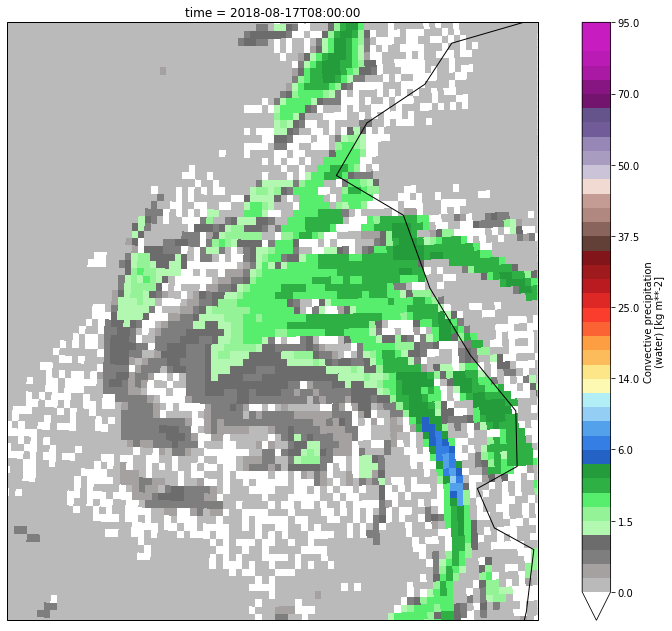

In [11]:
ds0 = xr.open_dataset("I:/Level_00/grapesMeso/2018081700/grapesMeso_acpcp_2018081700007.nc")
ds1 = xr.open_dataset("I:/Level_00/grapesMeso/2018081700/grapesMeso_acpcp_2018081700008.nc")
ds1.acpcp.values = ds1.acpcp.values-ds0.acpcp.values
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((114.1, 122.1, 28.9, 36.9),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds1['acpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

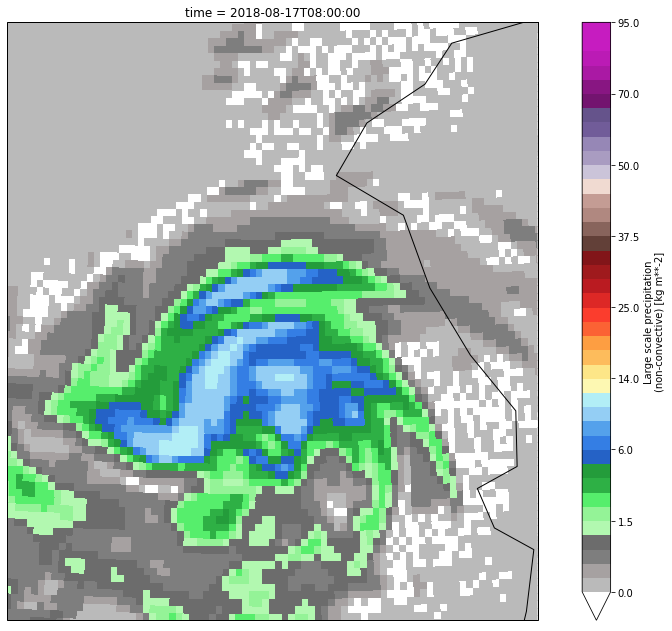

In [8]:
ds0 = xr.open_dataset("I:/Level_00/grapesMeso/2018081700/grapesMeso_ncpcp_2018081700007.nc")
ds1 = xr.open_dataset("I:/Level_00/grapesMeso/2018081700/grapesMeso_ncpcp_2018081700008.nc")
ds1.ncpcp.values = ds1.ncpcp.values-ds0.ncpcp.values
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((114.1, 122.1, 28.9, 36.9),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds1['ncpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

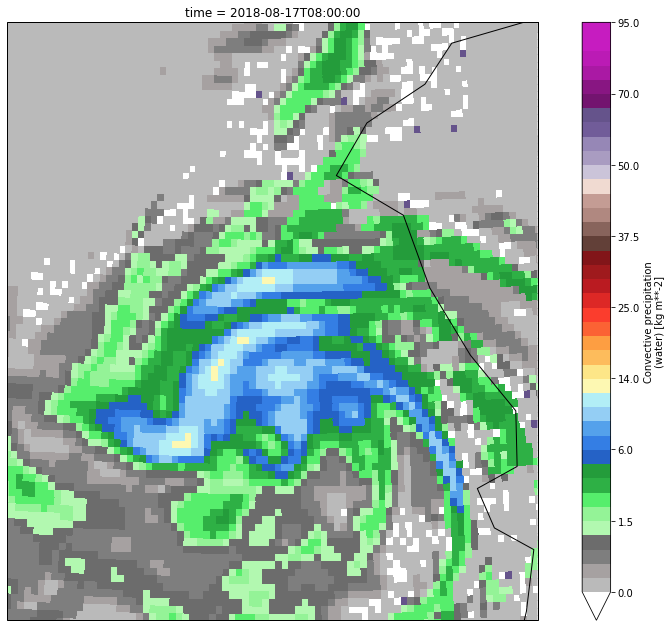

In [12]:
ds2 = xr.open_dataset("/media/kan-dai/MESO/Level_01/grapesMeso/2018081700/grapesMeso_tp_2018081700008.nc")
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((114.1, 122.1, 28.9, 36.9),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds2['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## Grapes3km模式处理

In [24]:
# set origin and output directory
data_dir = pathlib.Path("I:/Level_00/grapes3km")
out_dir = pathlib.Path("I:/Level_01/grapes3km")

# set forecast hours
fhours = np.arange(36) + 1

# loop every running time
for file_dir in data_dir.glob("????????00"):
    # extract model initial time
    init_time = datetime.strptime(file_dir.name, "%Y%m%d%H")
        
    # check missing file directory
    file_missing = False
    for ifhour in fhours:
        file_b = file_dir.joinpath(
            "grapes3km_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not file_b.is_file():
            file_missing = True
            break
    if file_missing:
        print("Missing:"+init_time.strftime("%Y%m%d%H%M"))
        continue
        
    # create output subdirectory
    out_subdir = out_dir.joinpath(init_time.strftime("%Y%m%d%H"))
    if not out_subdir.exists():
        out_subdir.mkdir(parents=True, exist_ok=True)
    
    # loop every forecast hour
    for ifhour in fhours:
        # construct file name
        file_b1 = file_dir.joinpath(
            "grapes3km_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        
        # calculate 1h accumulated precipitation
        if ifhour == 1:
            ds_b1 = xr.open_dataset(file_b1)
            if "ncpcp" in ds_b1.keys():
                var_name = "ncpcp"
            else:
                var_name = "unknown"
        else:
            ds_b0 = xr.open_dataset(file_b0)
            ds_b1 = xr.open_dataset(file_b1)
            if "ncpcp" in ds_b1.keys():
                var_name = "ncpcp"
            else:
                var_name = "unknown"
            ds_b1[var_name].values = ds_b1[var_name].values - ds_b0[var_name].values
        
        # save to output subdirectory
        outfile = out_subdir.joinpath(
            "grapes3km_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not outfile.is_file():
            # subset the grid
            ds_b1.rename({var_name:"tp"}).interp(
                longitude=np.arange(102, 135.05, 0.1),
                latitude=np.arange(50, 16.95, -0.1)).to_netcdf(outfile)
        file_b0 = file_b1
        

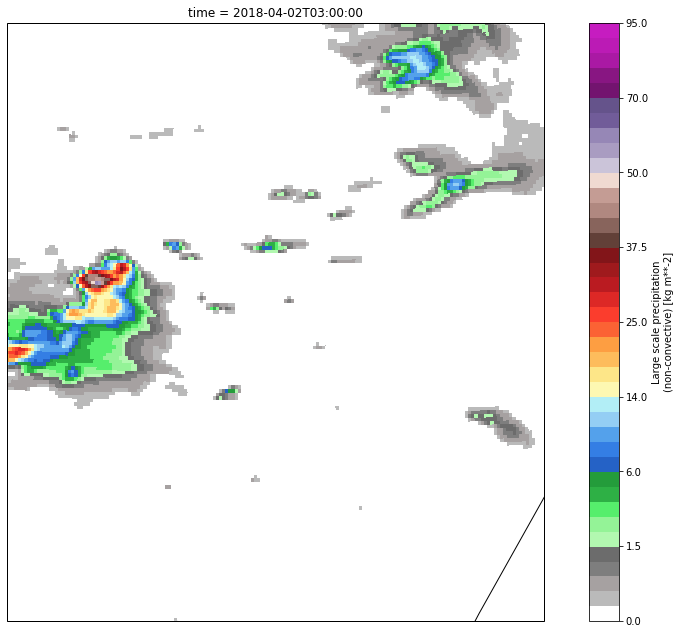

In [11]:
ds = xr.open_dataset("I:/Level_01/grapes3km/2018040112/grapes3km_tp_20180401120015.nc")
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((116, 121, 27, 32),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

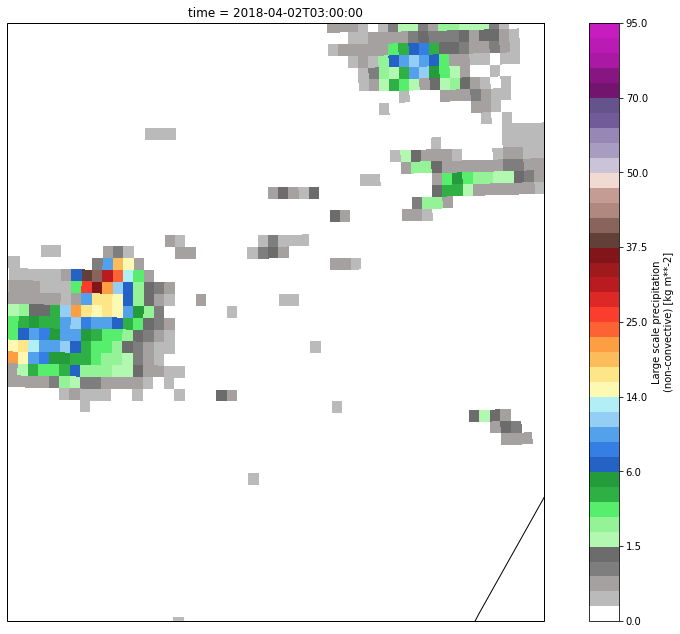

In [15]:
ds1 = ds.interp(longitude=np.arange(102, 135.05, 0.1), latitude=np.arange(50, 16.95, -0.1), method='linear')
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((116, 121, 27, 32),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds1['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

## Grapes3km模式处理(ESMF)

In [3]:
# prepare the xESMF regridder

import xesmf as xe

# data grid
ds_in = xr.open_dataset("/media/kan-dai/MESO/Level_00/grapes3km/2018071000/grapes3km_ncpcp_20180710000018.nc")
ds_in = ds_in.rename({"longitude":"x", "latitude":"y"})
x = ds_in.coords['x'].values
y = ds_in.coords['y'].values
dx = x[1] - x[0]
dy = y[1] - y[0]
lon, lat = np.meshgrid(x, y)
ds_in.coords['lon'] = (("y", "x"), lon)
ds_in.coords['lat'] = (("y", "x"), lat)
lon_b = np.append((x - dx*0.5), x[-1]+dx*0.5)
lat_b = np.append((y - dy*0.5), y[-1]+dy*0.5)
lon_b, lat_b = np.meshgrid(lon_b, lat_b)
ds_in.coords['lon_b'] = (("y_b", "x_b"), lon_b)
ds_in.coords['lat_b'] = (("y_b", "x_b"), lat_b)

# output grid
x = np.arange(102, 135.05, 0.1)
y = np.arange(50, 16.95, -0.1)
dx = x[1] - x[0]
dy = y[1] - y[0]
lon, lat = np.meshgrid(x, y)
lon_b = np.append((x - dx*0.5), x[-1]+dx*0.5)
lat_b = np.append((y - dy*0.5), y[-1]+dy*0.5)
lon_b, lat_b = np.meshgrid(lon_b, lat_b)
ds_out = xr.Dataset(
    {'x': (['x'], x), 'y': (['y'], y)},
    coords={'lon': (("y", "x"), lon), 
            'lat': (("y", "x"), lat),
            'lon_b': (("y_b", "x_b"), lon_b),
            'lat_b': (("y_b", "x_b"), lat_b)})

# construct regridder
regridder = xe.Regridder(ds_in, ds_out, 'conservative', periodic=False)

Overwrite existing file: conservative_1101x1101_331x331.nc 
 You can set reuse_weights=True to save computing time.


In [5]:
# set origin and output directory
data_dir = pathlib.Path("/media/kan-dai/MESO/Level_00/grapes3km")
out_dir = pathlib.Path("/media/kan-dai/MESO/Level_01/grapes3km")

# set forecast hours
fhours = np.arange(36) + 1

# loop every running time
for file_dir in data_dir.glob("????????12"):
    # extract model initial time
    init_time = datetime.strptime(file_dir.name, "%Y%m%d%H")
        
    # check missing file directory
    file_missing = False
    for ifhour in fhours:
        file_b = file_dir.joinpath(
            "grapes3km_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not file_b.is_file():
            file_missing = True
            break
    if file_missing:
        print("Missing:"+init_time.strftime("%Y%m%d%H%M"))
        continue
        
    # create output subdirectory
    out_subdir = out_dir.joinpath(init_time.strftime("%Y%m%d%H"))
    if not out_subdir.exists():
        out_subdir.mkdir(parents=True, exist_ok=True)
    
    # loop every forecast hour
    for ifhour in fhours:
        # construct file name
        file_b1 = file_dir.joinpath(
            "grapes3km_ncpcp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        
        # calculate 1h accumulated precipitation
        if ifhour == 1:
            ds_b1 = xr.open_dataset(file_b1)
            if "ncpcp" in ds_b1.keys():
                var_name = "ncpcp"
            else:
                var_name = "unknown"
        else:
            ds_b0 = xr.open_dataset(file_b0)
            ds_b1 = xr.open_dataset(file_b1)
            if "ncpcp" in ds_b1.keys():
                var_name = "ncpcp"
            else:
                var_name = "unknown"
            ds_b1[var_name].values = ds_b1[var_name].values - ds_b0[var_name].values
            
        # upscaling to 0.1x0.1 grid
        ds_out = xr.Dataset(
            {'x': (['x'], x), 'y': (['y'], y)},
            coords={'lon': (("y", "x"), lon), 
                    'lat': (("y", "x"), lat),
                    'lon_b': (("y_b", "x_b"), lon_b),
                    'lat_b': (("y_b", "x_b"), lat_b)})
        ds_out["tp"] = regridder(ds_b1[var_name])
        
        # save to output subdirectory
        outfile = out_subdir.joinpath(
            "grapes3km_tp_"+init_time.strftime("%Y%m%d%H%M")+
            "{0}".format(ifhour)+".nc")
        if not outfile.is_file():
            # subset the grid
            ds_out.rename({'x':'longitude', 'y':'latitude'}).to_netcdf(outfile)
        file_b0 = file_b1

In [4]:
# 尝试使用 ESMF 来进行插值，需要在linux环境下安装运行, 详细可参考
# https://xesmf.readthedocs.io/en/latest/Compare_algorithms.html
# https://github.com/nawendt/esmpy-tutorial/blob/master/esmpy_tutorial.ipynb
# 目前使用bilinear方法没有问题, 但使用conserve方法需要corner坐标，还没有研究清楚
#
import xesmf as xe

ds = xr.open_dataset("/media/kan-dai/MESO/Level_01/grapes3km/2018040112/grapes3km_tp_20180401120015.nc")
ds = ds.rename({"longitude":"lon", "latitude":"lat"})
ds_out = xr.Dataset({'lat': (['lat'], np.arange(50, 16.95, -0.05)),
                     'lon': (['lon'], np.arange(102, 135.05, 0.05))})
regridder = xe.Regridder(ds, ds_out, 'bilinear')
dr_out = regridder(ds['tp'])
dr_out

In [32]:
import xesmf as xe

ds = xr.open_dataset("/media/kan-dai/MESO/Level_00/grapes3km/2018071000/grapes3km_ncpcp_20180710000018.nc")
ds = ds.rename({"longitude":"x", "latitude":"y"})
x = ds.coords['x'].values
y = ds.coords['y'].values
dx = x[1] - x[0]
dy = y[1] - y[0]
lon, lat = np.meshgrid(x, y)
ds.coords['lon'] = (("y", "x"), lon)
ds.coords['lat'] = (("y", "x"), lat)
lon_b = np.append((x - dx*0.5), x[-1]+dx*0.5)
lat_b = np.append((y - dy*0.5), y[-1]+dy*0.5)
lon_b, lat_b = np.meshgrid(lon_b, lat_b)
ds.coords['lon_b'] = (("y_b", "x_b"), lon_b)
ds.coords['lat_b'] = (("y_b", "x_b"), lat_b)


x = np.arange(102, 135.05, 0.1)
y = np.arange(50, 16.95, -0.1)
dx = x[1] - x[0]
dy = y[1] - y[0]
lon, lat = np.meshgrid(x, y)
lon_b = np.append((x - dx*0.5), x[-1]+dx*0.5)
lat_b = np.append((y - dy*0.5), y[-1]+dy*0.5)
lon_b, lat_b = np.meshgrid(lon_b, lat_b)
ds_coarse = xr.Dataset(
    {'x': (['x'], x), 'y': (['y'], y)},
    coords={'lon': (("y", "x"), lon), 
            'lat': (("y", "x"), lat),
            'lon_b': (("y_b", "x_b"), lon_b),
            'lat_b': (("y_b", "x_b"), lat_b)})

In [33]:
def regrid(ds_in, ds_out, dr_in, method):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, ds_out, method, periodic=True)
    dr_out = regridder(dr_in)
    regridder.clean_weight_file()
    return dr_out

Create weight file: conservative_1101x1101_331x331.nc
Remove file conservative_1101x1101_331x331.nc


In [34]:
ds_coarse

<xarray.Dataset>
Dimensions:  (time: 1, x: 331, x_b: 332, y: 331, y_b: 332)
Coordinates:
  * x        (x) float64 102.0 102.1 102.2 102.3 ... 134.7 134.8 134.9 135.0
  * y        (y) float64 50.0 49.9 49.8 49.7 49.6 ... 17.4 17.3 17.2 17.1 17.0
    lon      (y, x) float64 102.0 102.1 102.2 102.3 ... 134.7 134.8 134.9 135.0
    lat      (y, x) float64 50.0 50.0 50.0 50.0 50.0 ... 17.0 17.0 17.0 17.0
    lon_b    (y_b, x_b) float64 102.0 102.0 102.1 102.2 ... 134.8 134.9 135.0
    lat_b    (y_b, x_b) float64 50.05 50.05 50.05 50.05 ... 16.95 16.95 16.95
  * time     (time) datetime64[ns] 2018-07-10T18:00:00
Dimensions without coordinates: x_b, y_b
Data variables:
    tp       (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

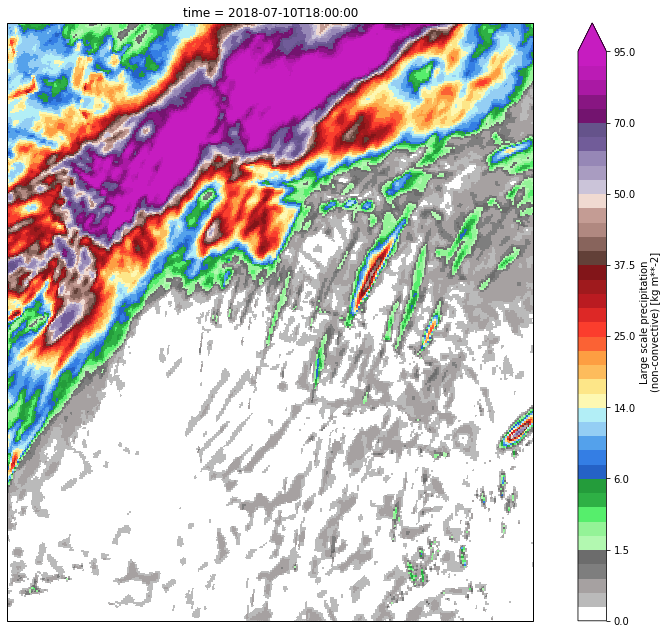

In [30]:
fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((104, 112, 28, 36),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds['ncpcp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

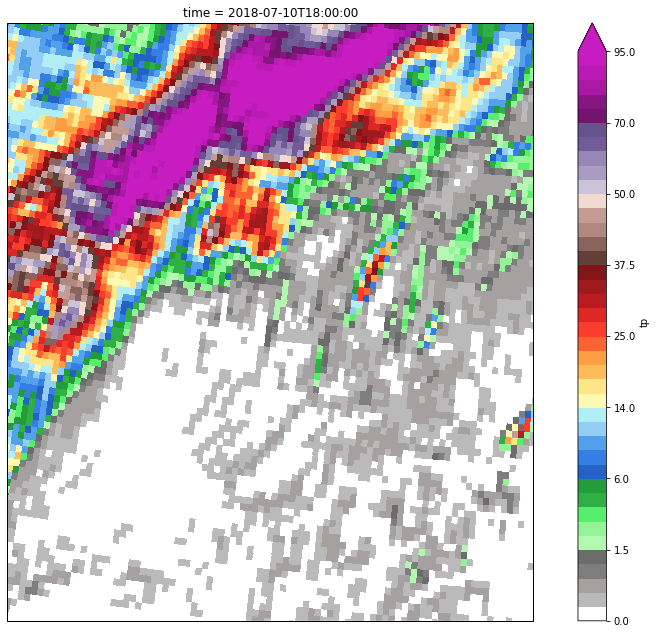

In [35]:
ds_coarse["tp"] = regrid(ds, ds_coarse, ds['ncpcp'], "conservative")


fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((104, 112, 28, 36),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds_coarse['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()

Create weight file: bilinear_1101x1101_331x331_peri.nc
Remove file bilinear_1101x1101_331x331_peri.nc


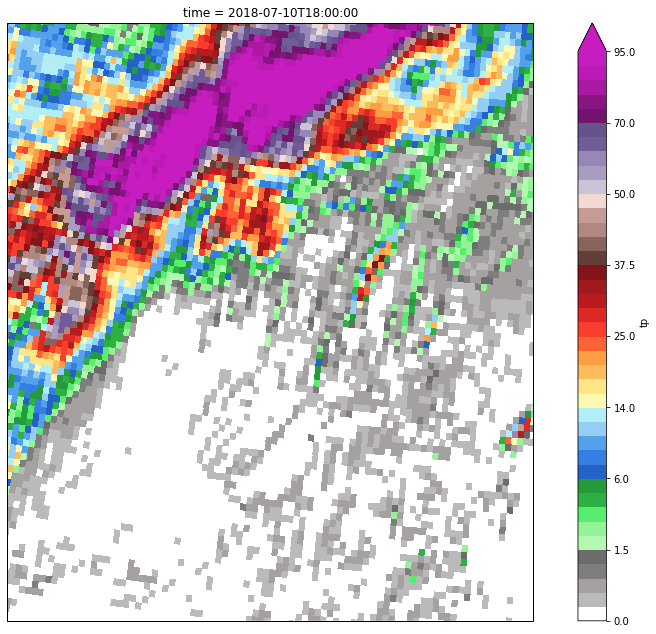

In [36]:
ds_coarse["tp"] = regrid(ds, ds_coarse, ds['ncpcp'], "bilinear")


fig = plt.figure(figsize=(16,11))
datacrs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=118))
ax.set_extent((104, 112, 28, 36),crs=datacrs)
cmap, norm = cm_qpf_nws(atime=1)
ds_coarse['tp'].isel(time=0).plot(ax=ax, transform=datacrs, norm=norm, cmap=cmap)
ax.coastlines()
plt.show()